In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def predict_image(model, x):
    x = x.astype('float32')
    x = x / 255.0

    x = np.expand_dims(x, axis=0)

    image_predict = model.predict(x, verbose=0)
    return (np.argmax(image_predict),image_predict)

    
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


img_rows, img_cols = 28, 28  

num_classes = 10 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data() 

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

11490434/11490434 [==============================] - 5s 0us/step


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Set your variables here: 
epochs = 7
model = Sequential()

In [3]:
model.add(Conv2D(filters=32 , kernel_size=(3,3) ,activation='relu',input_shape= input_shape))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32, kernel_size= (3,3), activation='relu'))
model.add( Flatten(input_shape=input_shape)) 
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=64, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
scores = model.evaluate(test_images, test_labels, verbose=0)
# Add a print statement for the test accuracy
print(test_acc)

Epoch 1/7
938/938 [==============================] - 6s 6ms/step - loss: 0.2006 - accuracy: 0.9384 - val_loss: 0.0604 - val_accuracy: 0.9797
Epoch 2/7
938/938 [==============================] - 6s 7ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0471 - val_accuracy: 0.9847
Epoch 3/7
938/938 [==============================] - 6s 6ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0393 - val_accuracy: 0.9885
Epoch 4/7
938/938 [==============================] - 6s 6ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 5/7
938/938 [==============================] - 6s 7ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 6/7
938/938 [==============================] - 7s 7ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0287 - val_accuracy: 0.9909
Epoch 7/7
938/938 [==============================] - 6s 6ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0325 - val_accuracy: 0.9904
313/313 - 0s 

In [6]:
model.save('final_project_model.keras')

The number is: 54


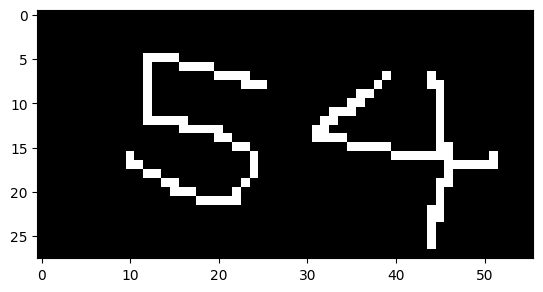

In [16]:
path = "test3.jpg"
img = Image.open(path)
plt.imshow(np.squeeze(img))
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata=np.mean(np.array(img), axis=2)*4
numpydata=np.reshape(numpydata,(28,numpydata.shape[1],1))
numpydatalist=[]
num = numpydata.shape[1]/28
for i in range(int(num)):
    thing = []
    for j in range(28):
        thing+=[numpydata[j][0+28*i:28*(i+1)]]
    numpydatalist+=[thing]
num = ''
for i in range(len(numpydatalist)):
    numpydatalist[i] = np.asarray(numpydatalist[i])
    arr = predict_image(model, numpydatalist[i])
    num+=str(int(arr[0]))
print("The number is:",num)